In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 데이터 로드 및 초기 설정

1.1. 데이터 로드

2. 데이터 구조 및 결측치 확인

2.1. 데이터 구조 확인
2.2. 데이터 결측치 확인

3. 타겟 변수 이진 변환

4. Feature, Target 분리 및 타입 정리

5. EDA

In [2]:
# 1. 데이터 로드 및 초기 설정
# 1.1. 데이터 로드
shoppers_df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# 2.1. 데이터 구조 확인
display(shoppers_df.head())
print(shoppers_df.info())
display(shoppers_df.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
# 2.2. 데이터 결측치 확인
print(shoppers_df.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Revenue
0    10422
1     1908
Name: count, dtype: int64
Revenue
0    84.525547
1    15.474453
Name: proportion, dtype: float64


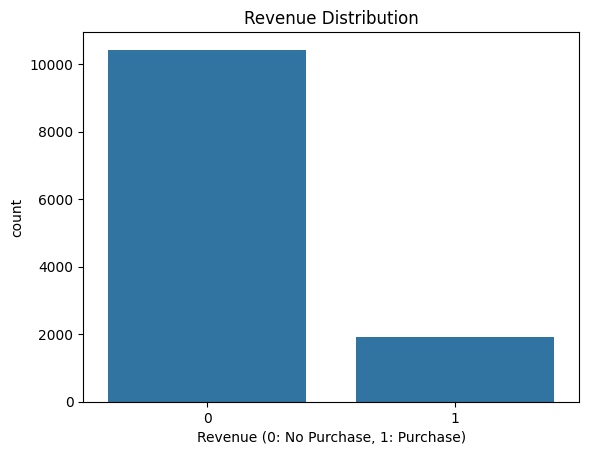

In [30]:
# 불균형 확인
target = shoppers_df["Revenue"]

print(target.value_counts())
print(target.value_counts(normalize=True) * 100)

sns.countplot(x=target)
plt.title("Revenue Distribution")
plt.xlabel("Revenue (0: No Purchase, 1: Purchase)")
plt.show()

In [5]:
# 3. Target 변수 이진 변환

# 현재 True/False를 1/0으로 변환
shoppers_df["Revenue"] = shoppers_df["Revenue"].astype(int)
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


In [6]:
# 4. Feature, Target 분리 및 타입 정리

# Target
X = shoppers_df.drop("Revenue", axis=1)
y = shoppers_df["Revenue"]

In [7]:
# Numerical Features
numerical_features = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay'
]

# categorical로 사용할 int 타입 -> str로 변환
for col in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']:
    X[col] = X[col].astype(str)

# Categorical Features (Weekend는 bool 타입 유지)
categorical_features = [
    'Month',
    'OperatingSystems',
    'Browser',
    'Region', 
    'TrafficType',
    'VisitorType',
    'Weekend'
]

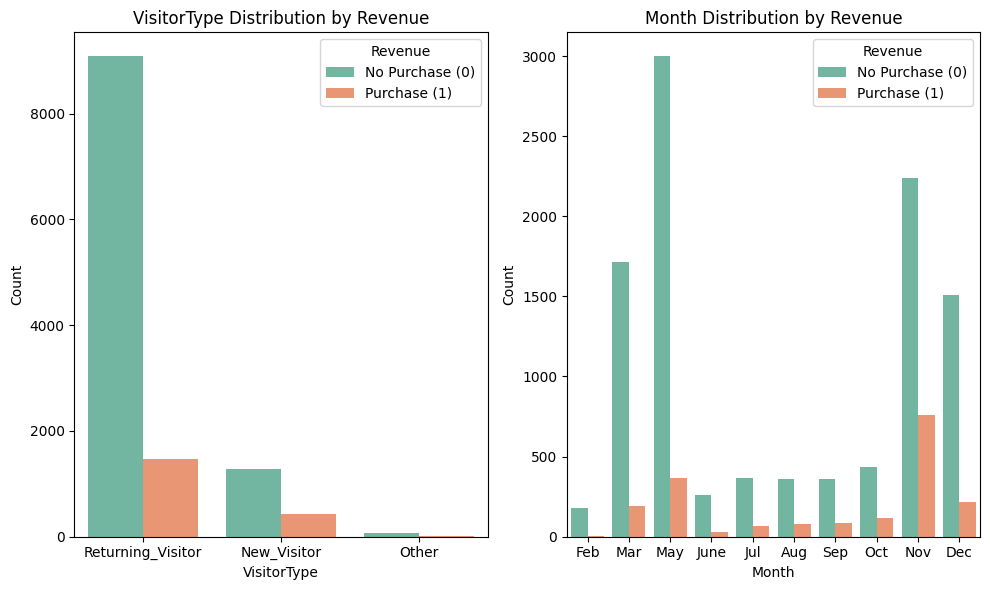

In [ ]:
# 시각화 설정 (Categorical Features)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# 1. VisitorType별 Revenue 분포
sns.countplot(x='VisitorType', hue='Revenue', data=shoppers_df, ax=axes[0], palette='Set2')
axes[0].set_title('VisitorType Distribution by Revenue')
axes[0].set_ylabel('Count')
axes[0].legend(title='Revenue', labels=['No Purchase (0)', 'Purchase (1)'])

# 2. Month별 Revenue 분포 (Jan, Apr 제외)
months= ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x='Month', hue='Revenue', data=shoppers_df, ax=axes[1], order=months, palette='Set2')
axes[1].set_title('Month Distribution by Revenue')
axes[1].set_ylabel('Count')
axes[1].legend(title='Revenue', labels=['No Purchase (0)', 'Purchase (1)'])

plt.tight_layout()
plt.show()

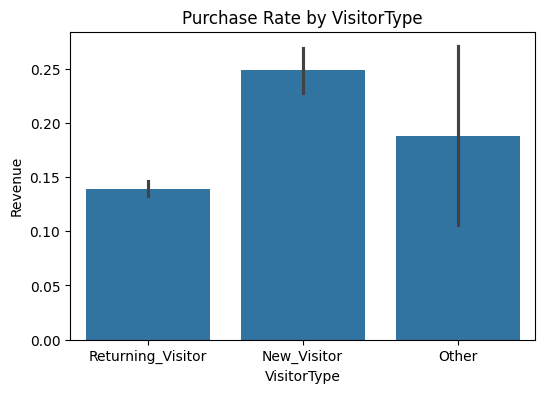

In [25]:
# 구매율 확인
plt.figure(figsize=(6,4))
sns.barplot(x="VisitorType", y="Revenue", data=shoppers_df)
plt.title("Purchase Rate by VisitorType")
plt.show()

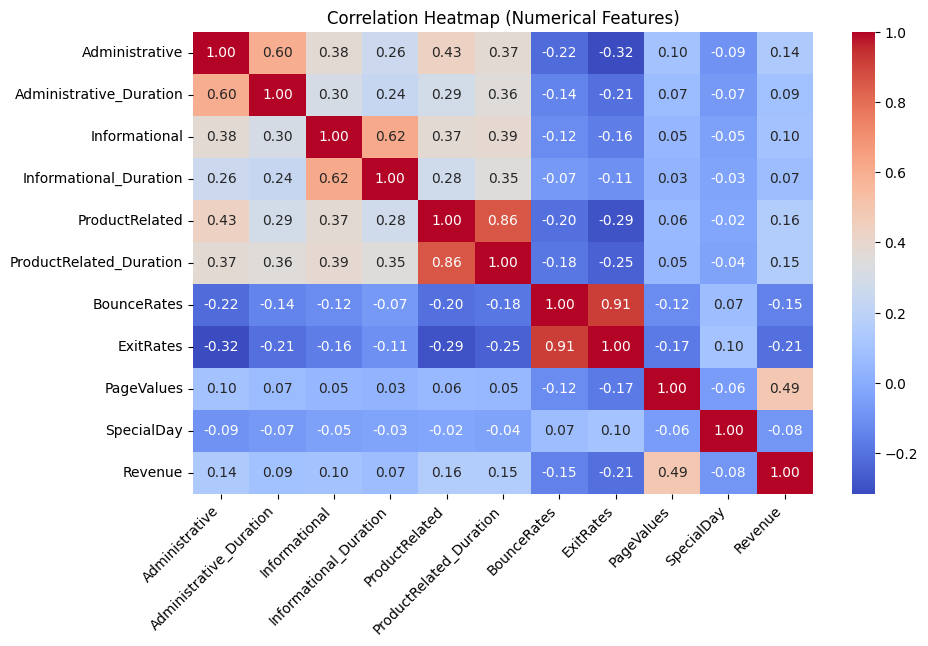

In [23]:
# 시각화 설정 (Numerical Features)
numerical_cols_for_corr = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay',
    'Revenue'
]

plt.figure(figsize=(10, 6))

# 상관계수
corr_matrix = shoppers_df[numerical_cols_for_corr].corr()

# 히트맵
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()